# 张量的简介和创建
pytorch官方文档:[官方文档](https://pytorch.org/docs/stable/torch.html?)  
本文大部分参考博客地址:[系统学习pytorch笔记_翻滚的小@强](https://blog.csdn.net/wuzhongqiang/article/details/105465136?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522169102372316800186590892%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=169102372316800186590892&biz_id=&utm_medium=distribute.pc_search_result.none-task-code-2~all~first_rank_ecpm_v1~rank_v31_ecpm-12-105465136-0-null-null.142^v92^insert_down1&utm_term=%E7%B3%BB%E7%BB%9F%E5%AD%A6%E4%B9%A0pytorch)
## 1.张量的属性  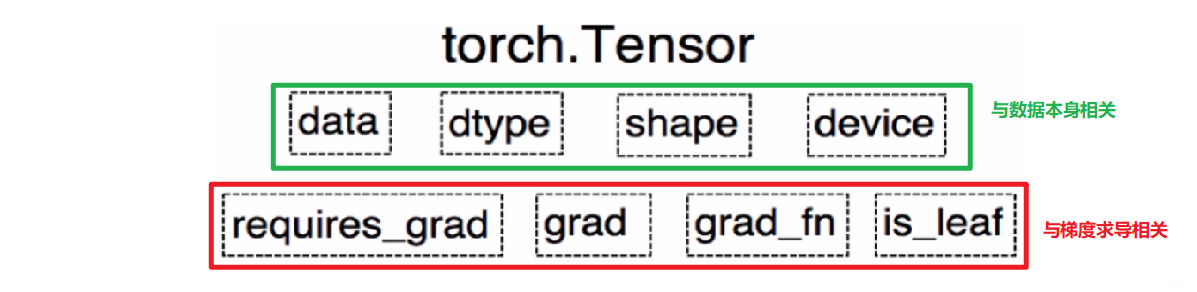  
上面是张量数据相关，下面四个和自动求导相关  
## 2.张量的创建：  
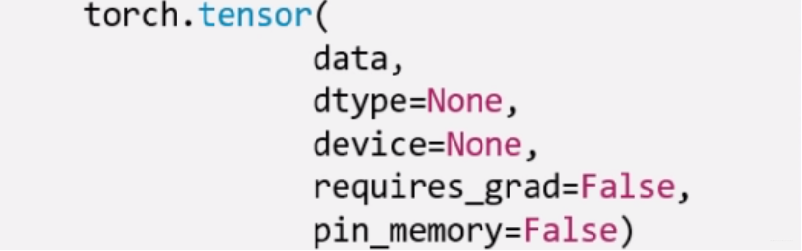


|属性|介绍|
|-|-|
|data|data是数据，可以是list，也可以是numpy|
|dtype|dtype是数据类型，默认和data一致，常用的数据类型是如torch.FloatTensor, torch.cuda.FloatTensor, 用的最多的一般是float32和int64(torch.long)|
|device|决定张量放在何处，cpu or gpu|
|requires_grad|决定是否需要计算梯度，如果需要反向传播，则需要打开梯度|
|pin_memory|表示是否存于内存锁页，设置为false即可|

#### 1.直接创建张量

In [2]:
import numpy as np
import torch

a = np.ones((3,3))
print("a的数据类型",a.dtype)
print(a)
a1 = torch.from_numpy(a)
print(a1)
b = torch.tensor([1,2.0,3,4])
print(b)
print(b.dtype)

a的数据类型 float64
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([1., 2., 3., 4.])
torch.float32


#### 2.通过numpy数组来创建  
- torch.from_numpy(ndarray):从numpy创建tensor
- 注意：这个创建的tensor和numpy数组**共享内存**，当其中一个修改时，另一个也会改动
- 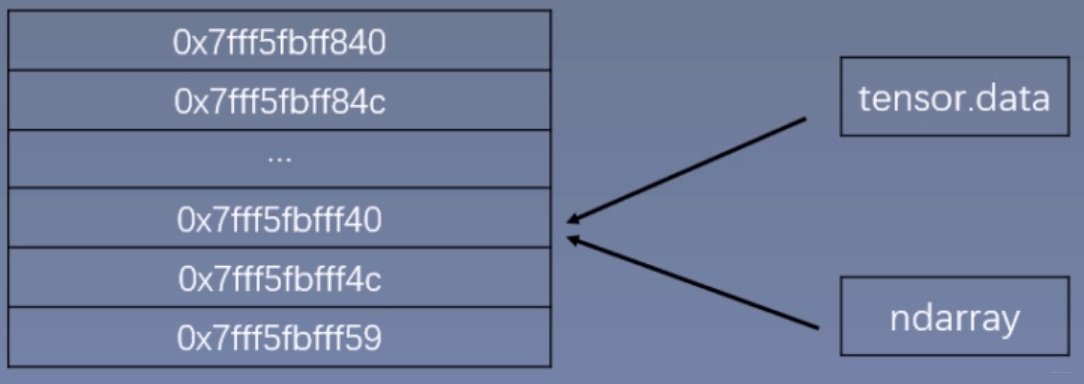

In [8]:
import numpy as np
import torch

array = np.array([[1,2,3],[4,5,6]])
c = torch.Tensor(array)
print(c)
print(array)
b = torch.from_numpy(array)
print(b)
array[0,0] = 114514
print("_________numpy被更改______________")
print("输出tensor b:",b)
print("输出tensor c:",c)
#c的赋值是用的tensor,改变array的值并不会改变c的值,b是用的from_numpy,b和array共享内存,改变array会同时改变b的值


tensor([[1., 2., 3.],
        [4., 5., 6.]])
[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
_________numpy被更改______________
输出tensor b: tensor([[114514,      2,      3],
        [     4,      5,      6]], dtype=torch.int32)
输出tensor c: tensor([[1., 2., 3.],
        [4., 5., 6.]])


可以看出，随着ndarray的修改，tensor也一起被修改了
#### 3.通过数值创建
torch.zeros():创建全为0的张量  
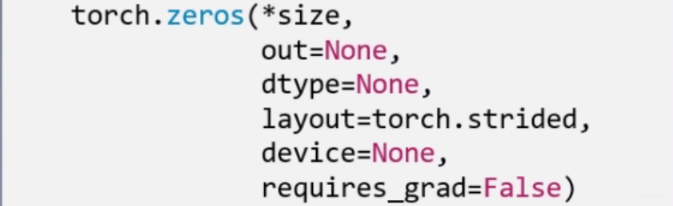  
其中的layout是数据在内存中的布局方式  
out是指把这个张量再输出给其他张量，这两个张量指向同一个地址

In [4]:
import numpy as np
import torch

out_tensor = torch.tensor([1])
print(out_tensor)
torch.zeros([3,4,5],out=out_tensor)
print(out_tensor)


tensor([1])
tensor([[[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]]])


`torch.zeros_like(input, dtype=None, layout=None, device=None, requires_grad=False)`  
创建和input张量形状一致的全零向量：

In [9]:
import torch
tensor1 = torch.tensor([1,2,3,4])
tensor_0 = torch.zeros_like(tensor1)
print(tensor_0)

tensor([0, 0, 0, 0])


与全张量类似的是全一张量，函数分别是：
`torch.ones()`和`torch.ones_like()`  
用法和全零张量一致。

此外还支持自定义填充张量：`torch.full(),torch.full_like()`  
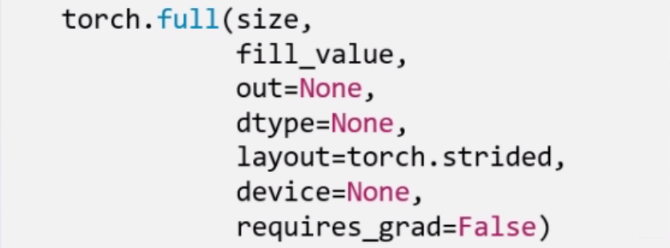  
其中的fill_value就是用于填充的值：  

In [10]:
import torch
tenser1 = torch.tensor([[1,2,3,4],[2,2,3,4]])
tenser2 = torch.full([2,3],12)#其中的12是用于填充的值
print(tenser2,tenser2.shape)
tenser3 = torch.full_like(tenser1,14)
print(tenser3,tenser3.shape)

tensor([[12, 12, 12],
        [12, 12, 12]]) torch.Size([2, 3])
tensor([[14, 14, 14, 14],
        [14, 14, 14, 14]]) torch.Size([2, 4])


`tensor.arrange()`:创建等差的一维张量[start,end)左闭右开，取不到右边的值
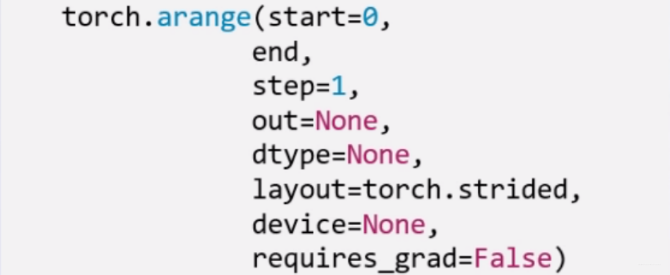  
step是步长

In [11]:
import torch
print(torch.arange(0,10,2))

tensor([0, 2, 4, 6, 8])


`torch.linspace()`创建一个均分数列，和arrange着重点不同，linspace是有了start和end，设置step指定把这个数列分成step个数。  
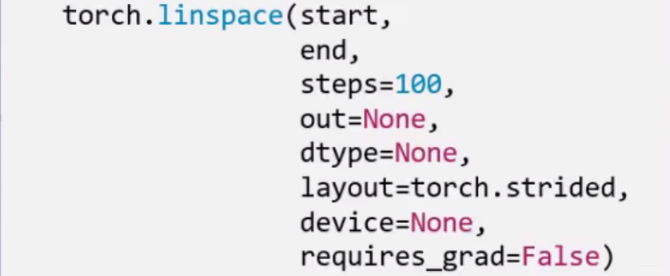
其中，数列是[start,end],左右都是闭区间（和arrange不同）

In [13]:
import torch
a = torch.linspace(0,10,5)
print(a)
b = torch.linspace(0,10,7)
print(b)
print(torch.linspace(0,10,20))
#step是均分成的个数,而间隔由[end-start]/step

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
tensor([ 0.0000,  1.6667,  3.3333,  5.0000,  6.6667,  8.3333, 10.0000])
tensor([ 0.0000,  0.5263,  1.0526,  1.5789,  2.1053,  2.6316,  3.1579,  3.6842,
         4.2105,  4.7368,  5.2632,  5.7895,  6.3158,  6.8421,  7.3684,  7.8947,
         8.4211,  8.9474,  9.4737, 10.0000])


`torch.logspace()`创建对数张量  #实际情况，“创建指数张量”更符合我的直观理解
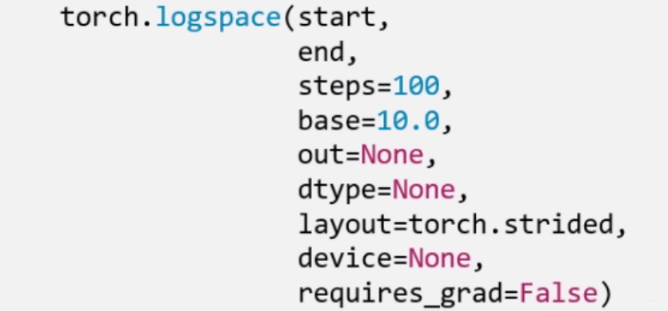  
其中的base是对数的底


In [19]:
import torch
a = torch.logspace(2,10,10,2)
print(a.shape)
print(a)

torch.Size([10])
tensor([   4.0000,    7.4070,   13.7159,   25.3984,   47.0315,   87.0906,
         161.2699,  298.6314,  552.9906, 1024.0000])


`torch.eyes()`：创建单位矩阵，默认方阵  
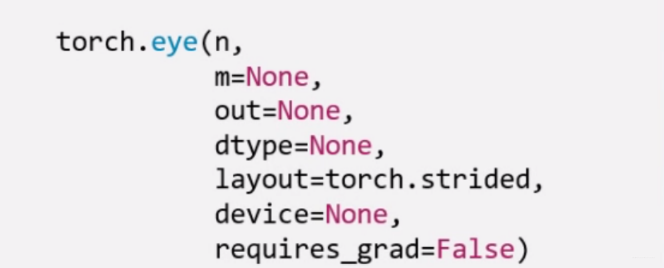  
其中n是行数，m是列数

In [20]:
import torch
print(torch.eye(2,3))
print(torch.eye(4))

tensor([[1., 0., 0.],
        [0., 1., 0.]])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


#### 4.依据概率分布来创建
`torch.normal()`:生成正态分布  
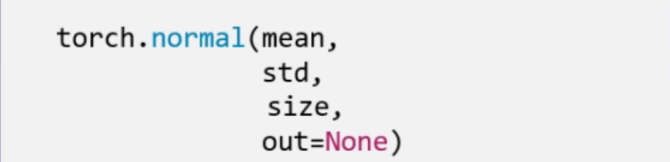
mean是标准差，std是方差，size是尺寸。  
根据mean和std分别有两种取值：  
mean是标量，std是标量；mean是张量，std是标量；  
mean是标量，std是张量；mean是张量，std是张量。
PS:有点迷迷糊糊的，先暂时放在这里



In [21]:
import torch
# 第一种模式 - 均值是标量， 方差是标量 - 此时产生的是一个分布， 从这一个分部种抽样相应的个数，所以这个必须指定size，也就是抽取多少个数
t_normal = torch.normal(0, 1, size=([4,3]))
print(t_normal)     # 来自同一个分布
# 第二种模式 - 均值是标量， 方差是张量 - 此时会根据方差的形状大小，产生同样多个分布，每一个分布的均值都是那个标量
std = torch.arange(1, 5, dtype=torch.float)
print(std.dtype)
t_normal2 = torch.normal(1, std)
print(t_normal2)    # 也产生来四个数，但是这四个数分别来自四个不同的正态分布，这些分布均值相等

# 第三种模式 - 均值是张量，方差是标量 - 此时也会根据均值的形状大小，产生同样多个方差相同的分布，从这几个分布中分别取一个值作为结果
mean = torch.arange(1, 5, dtype=torch.float)
t_normal3 = torch.normal(mean, 1)
print(t_normal3)    # 来自不同的分布，但分布里面方差相等

# 第四种模式 - 均值是张量， 方差是张量 - 此时需要均值的个数和方差的个数一样多，分别产生这么多个正太分布，从这里面抽取一个值
mean = torch.arange(1, 5, dtype=torch.float)
std = torch.arange(1, 5, dtype=torch.float)
t_normal4 = torch.normal(mean, std)
print(t_normal4)    # 来自不同的分布，各自有自己的均值和方差


tensor([[ 0.5141,  1.9605,  0.0321],
        [ 0.5502,  0.5678, -0.3297],
        [-0.4752, -1.4269,  0.6206],
        [ 0.4438, -0.0033,  0.8218]])
torch.float32
tensor([1.0603, 1.5573, 5.5260, 0.5988])
tensor([0.3844, 3.1140, 1.2879, 3.6650])
tensor([ 1.1372,  6.2823,  3.4888, -0.8184])


`torch.randn()`：标准正态分布  
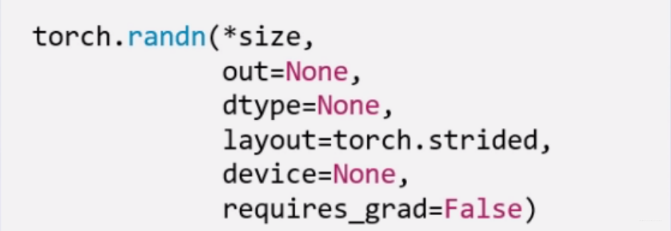

In [24]:
import torch
print(torch.randn([2,3]))

tensor([[ 0.5056, -0.5053,  0.1613],
        [-0.6598,  0.4332,  0.4580]])


`torch.rand()`，`torch.rand_like()`:生成在[0,1)之间的均匀分布。  
`torch.randint()`,`torch.randint_like()`:在区间low和hhigh之间生成整数均匀分布。  
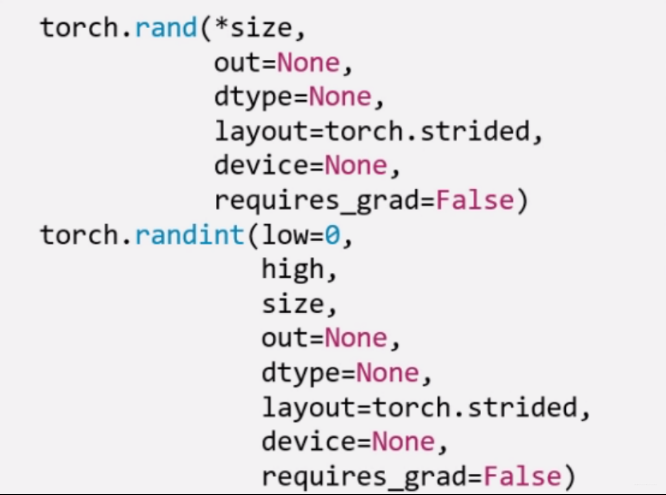

In [25]:
import torch
print(torch.randn([2,2]))
tensor1 = torch.tensor([1,2,3])
print(torch.randn_like(tensor1.float()))
print(torch.rand((3,3)))
print(torch.randint(0,10,(10,10)))


tensor([[-0.0250,  0.2991],
        [ 1.1719,  0.0569]])
tensor([ 0.5630, -0.5293,  0.3279])
tensor([[0.5868, 0.3361, 0.1933],
        [0.4875, 0.9805, 0.3994],
        [0.0613, 0.6023, 0.2155]])
tensor([[2, 3, 5, 6, 3, 1, 7, 7, 7, 2],
        [5, 1, 8, 8, 7, 3, 3, 7, 5, 8],
        [3, 1, 9, 1, 0, 9, 2, 3, 8, 6],
        [3, 7, 9, 6, 5, 1, 8, 7, 8, 8],
        [3, 8, 5, 1, 0, 0, 0, 1, 5, 0],
        [1, 8, 4, 0, 3, 4, 6, 2, 1, 7],
        [9, 2, 5, 0, 0, 4, 7, 4, 9, 2],
        [5, 9, 9, 9, 3, 5, 1, 5, 4, 6],
        [0, 9, 5, 9, 9, 9, 5, 9, 2, 0],
        [7, 8, 3, 5, 2, 6, 8, 9, 3, 3]])


`torch.randperm()`：生成一个0~n-1的随机排列，n是张量的长度，可以用来生成一个乱序排列  
`torch.bernoulli()`:以input为概率，生成伯努利分布(0-1分布，两点分布),input是一个张量，该张量每一项的值代表对应位置为1的概率。  
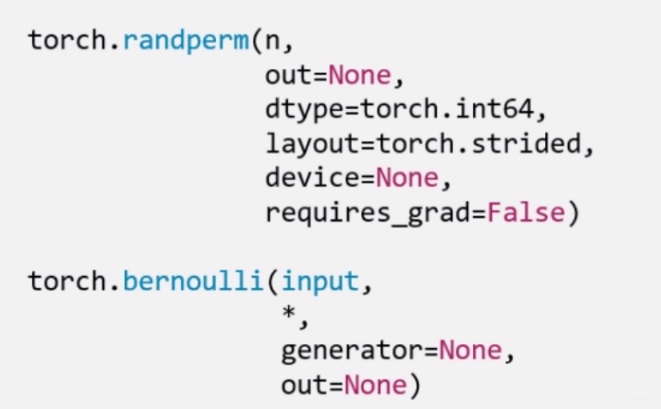

In [34]:
import torch
print(torch.randperm(20))
for i in range(10):
    print(torch.bernoulli(torch.tensor([0.2,0.8,0.5,0.7,0.1])))

tensor([ 2, 18, 16, 12,  5,  0,  4,  3, 13, 14, 10,  7,  1,  9, 15, 17,  6,  8,
        11, 19])
tensor([0., 1., 0., 1., 0.])
tensor([0., 1., 1., 1., 1.])
tensor([0., 1., 0., 1., 0.])
tensor([1., 1., 1., 0., 0.])
tensor([0., 1., 1., 1., 0.])
tensor([0., 0., 0., 1., 1.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0.])
tensor([0., 1., 1., 1., 0.])


## 3.张量的操作
### 3.1 张量的基本操作
#### **1.张量的拼接**  
`torch.cat(tensors, dim=0, out=None)`：将张量按照dim维度拼接，tensors表示**张量序列**，可以是多个张量dim表示拼接的维度，指定的拼接的维度值必须要相等  
`torch.stack(tensors, dim=0, out=None)`：在新创建的维度上进行拼接，tensors表示**张量序列**，dim表示维度,也就是新创建了一个维度，在新的维度上拼接


In [35]:
import torch
tensor1 = torch.tensor([[1,2,3],[4,5,6]])
print(f'tensor1.shape:{tensor1.shape}')
tensor2 = torch.zeros_like(tensor1)
tensor3 = torch.ones([2,3])
print("tensor1:\n",tensor1,"\ntensor2:\n",tensor2,"\ntensor3:\n",tensor3)
print(torch.cat([tensor1,tensor2,tensor3],dim=0))
print(torch.cat([tensor1,tensor2],dim=1))
# print(torch.cat([tensor1,tensor2,tensor3],dim=1))报错,维度不同

print(torch.stack([tensor1,tensor2,tensor3],0),torch.stack([tensor1,tensor2,tensor3],0).shape)
print(torch.stack([tensor1,tensor2,tensor3],1),torch.stack([tensor1,tensor2,tensor3],1).shape)


tensor1.shape:torch.Size([2, 3])
tensor1:
 tensor([[1, 2, 3],
        [4, 5, 6]]) 
tensor2:
 tensor([[0, 0, 0],
        [0, 0, 0]]) 
tensor3:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1, 2, 3, 0, 0, 0],
        [4, 5, 6, 0, 0, 0]])
tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.]]]) torch.Size([3, 2, 3])
tensor([[[1., 2., 3.],
         [0., 0., 0.],
         [1., 1., 1.]],

        [[4., 5., 6.],
         [0., 0., 0.],
         [1., 1., 1.]]]) torch.Size([2, 3, 3])


#### **2.张量的切分**  
`torch.chunk(input,chunks,dim=0)`:将张量按维度dim进行平均切分，返回值是张量列表，注意，如果不能整除，最后一份张量小于其他张量，dim表示要切分的维度,chunk表示要切分成的块数。

In [104]:
import torch
a = torch.ones((5,7))
print(a,a.shape)
tensor_list = torch.chunk(a,chunks=3,dim=0)
print(tensor_list,type(tensor_list))
# for itx, t in enumerate(tensor_list):
#     print(f"第{itx}个tensor:")
#     print(t)
tensor_list2 = torch.chunk(a,chunks=3,dim=1)
for itx, t1 in enumerate(tensor_list2):
    print(f"第{itx}个tensor:")
    print(t1)



tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]]) torch.Size([5, 7])
(tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]]), tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]]), tensor([[1., 1., 1., 1., 1., 1., 1.]])) <class 'tuple'>
第0个tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
第1个tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
第2个tensor:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])


`torch.split(tensor,split_size_or_sections,dim = 0)`:这个函数也是将张量按照维度dim切分，但是更加强大，可以指定切分的长度，split_size_or_sections为int时表示每一份的长度（应该和torch.chunk()类似），为list时，按照list元素切分。

In [39]:
import torch 
a = torch.randn((5,7))
print(f"a:{a}")
list_tensor1 = torch.split(a,split_size_or_sections=2)
for i,t in enumerate(list_tensor1):
    print(f"第{i}个张量,{t},形状为{t.shape}")
list_tensor2 = torch.split(a,split_size_or_sections=[2,3],dim=0)
for i,t in enumerate(list_tensor2):
    print(f"第{i}个张量,{t},形状为{t.shape}")

a:tensor([[ 1.0426,  0.2208,  1.9883,  0.4159,  0.5628, -1.2577,  1.3697],
        [-0.5026,  0.7792,  0.9014,  1.1172, -0.7511, -1.1203,  1.4334],
        [ 0.3320,  2.3284,  0.3630,  0.0768, -2.8349, -1.3418,  0.3776],
        [ 2.2538,  0.8564,  0.2898,  0.2426, -0.3724,  1.3366,  1.2612],
        [-1.5094,  1.3764,  0.6136,  0.1236,  0.8390, -0.2680,  2.8584]])
第0个张量,tensor([[ 1.0426,  0.2208,  1.9883,  0.4159,  0.5628, -1.2577,  1.3697],
        [-0.5026,  0.7792,  0.9014,  1.1172, -0.7511, -1.1203,  1.4334]]),形状为torch.Size([2, 7])
第1个张量,tensor([[ 0.3320,  2.3284,  0.3630,  0.0768, -2.8349, -1.3418,  0.3776],
        [ 2.2538,  0.8564,  0.2898,  0.2426, -0.3724,  1.3366,  1.2612]]),形状为torch.Size([2, 7])
第2个张量,tensor([[-1.5094,  1.3764,  0.6136,  0.1236,  0.8390, -0.2680,  2.8584]]),形状为torch.Size([1, 7])
第0个张量,tensor([[ 1.0426,  0.2208,  1.9883,  0.4159,  0.5628, -1.2577,  1.3697],
        [-0.5026,  0.7792,  0.9014,  1.1172, -0.7511, -1.1203,  1.4334]]),形状为torch.Size([2, 7])
第1个张量

#### 3.张量的索引  
`torch.index_select(input,dim,index,out=None)`:在维度dim上，按照index索引数据，返回值，以index索引数据拼接的张量。

In [42]:
import torch 
t = torch.randint(0,9,size=(3,3))
index = torch.tensor([0,2])
print(t)
t_selected = torch.index_select(t,dim=0,index=index)
print(t_selected)
t_selected = torch.index_select(t,dim=1,index=index)
print(t_selected)

tensor([[0, 2, 2],
        [2, 4, 8],
        [1, 2, 6]])
tensor([[0, 2, 2],
        [1, 2, 6]])
tensor([[0, 2],
        [2, 8],
        [1, 6]])


`torch.masked_select(input,mask,out=None)`：按照mask中的True进行索引，返回值是**一个张量**。input表示要被索引的张量，mask是一个与input同形状的布尔型的张量，值为true时对应位置被选中。

In [44]:
import torch
t = torch.randint(0,9,size=(3,3))
print(t)
mask_tensor_over = t.ge(5)#le表示<=5,gt表示>=5,lt表示<5
mask_tensor_below = t.lt(5)
print(mask_tensor_over)
print(mask_tensor_below)
print(torch.masked_select(t,mask_tensor_over))
print(torch.masked_select(t,mask_tensor_below))

tensor([[1, 7, 0],
        [8, 8, 8],
        [1, 8, 6]])
tensor([[False,  True, False],
        [ True,  True,  True],
        [False,  True,  True]])
tensor([[ True, False,  True],
        [False, False, False],
        [ True, False, False]])
tensor([7, 8, 8, 8, 8, 6])
tensor([1, 0, 1])


#### **4.张量的变换**  
`torch.reshape(input,shape)`:变换张量的形状，input是要变换的张量，shape表示新张量的形状。**注意**，张量在内存中是连续的时候，新张量与input共享数据内存  

In [119]:
import torch
t = torch.randperm(12)#随机序列
print(t)
t_reshaped = torch.reshape(t,(3,2,2))
t_reshaped2 = torch.reshape(t,(-1,3,2))#-1表示根据另两个参数,计算出当前位置的值
print(t_reshaped,t_reshaped.shape)
print(t_reshaped2,t_reshaped2.shape)


tensor([10,  3,  5,  9,  0,  7,  6,  1, 11,  8,  4,  2])
tensor([[[10,  3],
         [ 5,  9]],

        [[ 0,  7],
         [ 6,  1]],

        [[11,  8],
         [ 4,  2]]]) torch.Size([3, 2, 2])
tensor([[[10,  3],
         [ 5,  9],
         [ 0,  7]],

        [[ 6,  1],
         [11,  8],
         [ 4,  2]]]) torch.Size([2, 3, 2])


`torch.transpose(input, dim0,dim1)`:交换张量的两个维度，在矩阵的转置中常用，在图像的预处理中常用。

In [53]:
import torch
tensor = torch.randint(0,10,(2,3,4))
print(tensor,'shape:',tensor.shape)
transTensor = torch.transpose(tensor,0,2)
print(transTensor,'shape:',transTensor.shape)


tensor([[[4, 2, 8, 4],
         [3, 6, 0, 8],
         [3, 3, 4, 5]],

        [[7, 0, 9, 5],
         [1, 9, 0, 1],
         [2, 5, 6, 6]]]) shape: torch.Size([2, 3, 4])
tensor([[[4, 7],
         [3, 1],
         [3, 2]],

        [[2, 0],
         [6, 9],
         [3, 5]],

        [[8, 9],
         [0, 0],
         [4, 6]],

        [[4, 5],
         [8, 1],
         [5, 6]]]) shape: torch.Size([4, 3, 2])


`torch.t(input)`:二维张量的转置，相当于`torch.transpose(input,0,1)`。

In [54]:
import torch
tensor = torch.tensor([[1,2,3],[4,5,6]])
print(torch.t(tensor))
print(torch.transpose(tensor,0,1))

tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


`torch.squeeze(input,dim = None, out = None)`:当dim = None时，移除输入的张量所有长度为1的维度，当指定dim时，当且仅当指定的dim的长度为1的时候可以被移除,如果指定的维度长度不为1，则不对张量进行操作。

In [55]:
import torch
tensor = torch.randint(0,10,(1,2,3,1,2))
print(tensor)
print(torch.squeeze(tensor),torch.squeeze(tensor).shape)
print(torch.squeeze(tensor,dim=0),torch.squeeze(tensor,dim=0).shape)
print(torch.squeeze(tensor,dim=1),torch.squeeze(tensor,dim=1).shape)


tensor([[[[[7, 2]],

          [[2, 0]],

          [[1, 0]]],


         [[[1, 6]],

          [[0, 9]],

          [[7, 5]]]]])
tensor([[[7, 2],
         [2, 0],
         [1, 0]],

        [[1, 6],
         [0, 9],
         [7, 5]]]) torch.Size([2, 3, 2])
tensor([[[[7, 2]],

         [[2, 0]],

         [[1, 0]]],


        [[[1, 6]],

         [[0, 9]],

         [[7, 5]]]]) torch.Size([2, 3, 1, 2])
tensor([[[[[7, 2]],

          [[2, 0]],

          [[1, 0]]],


         [[[1, 6]],

          [[0, 9]],

          [[7, 5]]]]]) torch.Size([1, 2, 3, 1, 2])


`torch.unsqueeze(input, dim, out=None)`：在根据dim扩展维度。

In [65]:
import torch
tensor = torch.Tensor([[1,2,3],[4,5,6]])
print(tensor.shape)
print(torch.unsqueeze(tensor,dim = 0).shape)
print(torch.unsqueeze(tensor,dim = 1).shape)
print(torch.unsqueeze(tensor,dim = 2).shape)

torch.Size([2, 3])
torch.Size([1, 2, 3])
torch.Size([2, 1, 3])
torch.Size([2, 3, 1])


### 3.2张量的数学运算  
#### 3.2.1 标量运算
Pytorch中提供了丰富的数学运算，可以分为三大类： 加减乘除， 对数指数幂函数，三角函数  
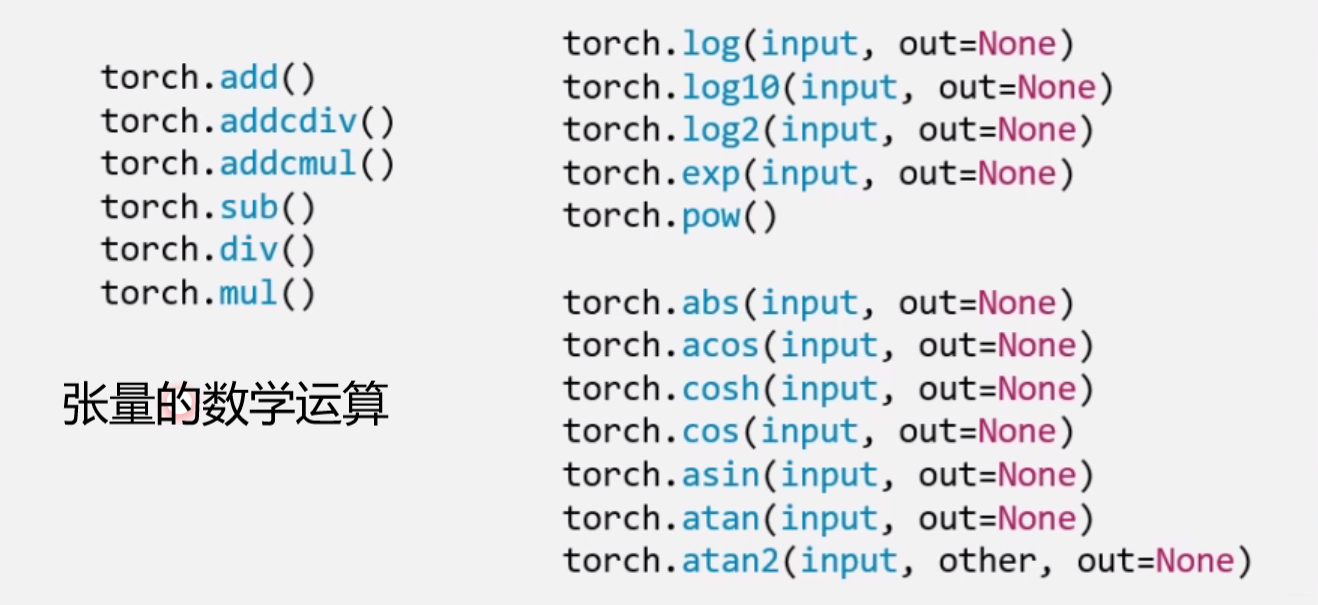

`torch.add(input, other, *, alpha=1, out=None)`:返回的张量=other*alpha+input. 这里的"*"表示再其后的参数必须用指定参数名来确定,不能用位置来确定.
torch.add()函数具有广播机制.

In [74]:
import torch
tensor1 = torch.zeros((2,2))
tensor2 = torch.ones((2,2))
#torch.add(input, other, *, alpha=1, out=None) → Tensor 返回的张量=other*alpha+input. 这里的"*"表示再其后的参数必须用指定参数名来确定,不能用位置来确定
print('add:',torch.add(tensor1,tensor2,alpha=2))
#torch.add()函数具有广播机制
tensor3 = torch.zeros((1,4))
tensor4 = torch.ones((4,1))
print('add_broadcast:',torch.add(tensor3,tensor4))
print('')


add: tensor([[2., 2.],
        [2., 2.]])
add_broadcast: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])



`torch.addcdiv(input, tensor1, tensor2, *, value=1, out=None) → Tensor`:返回张量=input+value*(tensor1/tensor2)
`torch.addcmul(input, tensor1, tensor2, *, value=1, out=None) → Tensor`:返回张量=input+value*(tensor1*tensor2)

In [77]:
import torch
t_input = torch.Tensor([1,1,1])
t_1 = torch.Tensor([2,2,2])
t_2 = torch.Tensor([4,4,4])
print(torch.addcdiv(t_input,t_1,t_2))
print(torch.addcmul(t_input,t_1,t_2))

tensor([1.5000, 1.5000, 1.5000])
tensor([9., 9., 9.])


减法操作(sub)和加法操作类似。乘法(mul)和除法(div)比加法简单，返回的都是input*(或/)other

**对数运算**
`torch.log(input, *, out=None) → Tensor`返回取对数后的张量,是以自然常数`e`为底的对数
`torch.log10`和`torch.log2`望文生义。可以用换底公式来自定义底数

In [81]:
import torch
import math
tensor = torch.Tensor([1,2,math.e,4,10,100])
print(torch.log(tensor))
print(torch.log10(tensor))
print(torch.log2(tensor))

tensor([0.0000, 0.6931, 1.0000, 1.3863, 2.3026, 4.6052])
tensor([0.0000, 0.3010, 0.4343, 0.6021, 1.0000, 2.0000])
tensor([0.0000, 1.0000, 1.4427, 2.0000, 3.3219, 6.6439])


**指数运算**  
`torch.exp(input, *, out=None) → Tensor`:返回以自然常数为底的指数值.  
`torch.pow(input, exponent, *, out=None) → Tensor`:返回指数,`input`,`exponent`是形状相同的张量。

In [103]:
import torch
tensor = torch.Tensor([1,2,3])
exponent = torch.Tensor([2,1,3])
print(torch.exp(tensor))
print(torch.exp(torch.mul(tensor,torch.log(torch.Tensor([2])))))
print(torch.pow(tensor,exponent))

tensor([ 2.7183,  7.3891, 20.0855])
tensor([2., 4., 8.])
tensor([ 1.,  2., 27.])


**绝对值运算**  
`torch.abs(input, *, out=None) → Tensor`:很显然的用法,返回一个张量是绝对值.

In [110]:
import torch 
tensor = torch.randint(-10,10,(2,3,4))
print(tensor)
print(torch.abs(tensor))

tensor([[[  5,   7,   9,   4],
         [ -7,  -4,   7,  -1],
         [-10,  -8,   2,  -5]],

        [[  9,   8,   6,  -4],
         [  3,   0,   7,   6],
         [ -4,  -2,   9,  -1]]])
tensor([[[ 5,  7,  9,  4],
         [ 7,  4,  7,  1],
         [10,  8,  2,  5]],

        [[ 9,  8,  6,  4],
         [ 3,  0,  7,  6],
         [ 4,  2,  9,  1]]])


**三角函数**  
`torch.sin()`,`torch.cos()`等  还有正切,反三角函数等,用法都一样  
仅以以上两个函数作为例子.  输入是弧度制,输出的是弧度制的三角函数的返回值.

In [112]:
import torch 
import math
tensor_tri = torch.Tensor([0,1,2,3,math.pi/2,math.pi])
print(torch.cos(tensor_tri))
print(torch.sin(tensor_tri))

tensor([ 1.0000e+00,  5.4030e-01, -4.1615e-01, -9.8999e-01, -4.3711e-08,
        -1.0000e+00])
tensor([ 0.0000e+00,  8.4147e-01,  9.0930e-01,  1.4112e-01,  1.0000e+00,
        -8.7423e-08])


#### 3.2.2 向量运算


In [122]:
import torch 
#统计值

a = torch.arange(1,10).float()
b = torch.Tensor([[1,2,3],[4,5,6]])
print(a)
print(torch.sum(b))
print(torch.mean(b))
print(torch.max(b))
print(torch.min(b))
print(torch.prod(b)) #累乘
print(torch.std(b))  #标准差
print(torch.var(b))  #方差
print(torch.median(b)) #中位数



tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor(21.)
tensor(3.5000)
tensor(6.)
tensor(1.)
tensor(720.)
tensor(1.8708)
tensor(3.5000)
tensor(3.)


In [123]:
#cum扫描

a = torch.Tensor([[1,2,3],[4,5,6]])

print(torch.cumsum(a,0))    # 累加
print(torch.cumprod(a,0))    # 累乘
print(torch.cummax(a,0).values)
print(torch.cummax(a,0).indices)
print(torch.cummin(a,0))


tensor([[1., 2., 3.],
        [5., 7., 9.]])
tensor([[ 1.,  2.,  3.],
        [ 4., 10., 18.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[0, 0, 0],
        [1, 1, 1]])
torch.return_types.cummin(
values=tensor([[1., 2., 3.],
        [1., 2., 3.]]),
indices=tensor([[0, 0, 0],
        [0, 0, 0]]))


In [125]:
import torch
#torch.sort和torch.topk可以对张量排序
a = torch.tensor([[9,7,8],[1,3,2],[5,6,4]]).float()
print(torch.topk(a,2,dim = 0),"\n")
print(torch.topk(a,2,dim = 1),"\n")
print(torch.sort(a,dim = 1),"\n")

#利用torch.topk可以在Pytorch中实现KNN算法


torch.return_types.topk(
values=tensor([[9., 7., 8.],
        [5., 6., 4.]]),
indices=tensor([[0, 0, 0],
        [2, 2, 2]])) 

torch.return_types.topk(
values=tensor([[9., 8.],
        [3., 2.],
        [6., 5.]]),
indices=tensor([[0, 2],
        [1, 2],
        [1, 0]])) 

torch.return_types.sort(
values=tensor([[7., 8., 9.],
        [1., 2., 3.],
        [4., 5., 6.]]),
indices=tensor([[1, 2, 0],
        [0, 2, 1],
        [2, 0, 1]])) 



#### 3.2.3 矩阵运算
矩阵运算必须是二维的张量.  
包括矩阵乘法,矩阵转置,矩阵的逆,矩阵求迹,矩阵范数,举证范数,矩阵行列式,矩阵求特征值,矩阵分解  
> 这里仅仅列出来,表示pytorch可以做到这些,我暂时不能完全理解这些值的作用.-2023.8.9



In [129]:
import torch
#矩阵乘法
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[2,0],[0,2]])
print(a@b)  #等价于torch.matmul(a,b) 或 torch.mm(a,b)
print(torch.matmul(a,b))
print(torch.mm(a,b))


tensor([[2, 4],
        [6, 8]])
tensor([[2, 4],
        [6, 8]])
tensor([[2, 4],
        [6, 8]])


In [130]:
#矩阵转置
a = torch.tensor([[1.0,2],[3,4]])
print(a.t())


tensor([[1., 3.],
        [2., 4.]])


In [131]:
#矩阵逆，必须为浮点类型
a = torch.tensor([[1.0,2],[3,4]])
print(torch.inverse(a))


tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])


In [132]:
#矩阵求trace
a = torch.tensor([[1.0,2],[3,4]])
print(torch.trace(a))


tensor(5.)


In [133]:
#矩阵求范数
a = torch.tensor([[1.0,2],[3,4]])
print(torch.norm(a))

#矩阵行列式
a = torch.tensor([[1.0,2],[3,4]])
print(torch.det(a))


tensor(5.4772)
tensor(-2.)


In [137]:
#矩阵特征值和特征向量
a = torch.tensor([[1.0,2],[-5,4]],dtype = torch.float)
print(torch.linalg.eig(a))

#两个特征值分别是 -2.5+2.7839j, 2.5-2.7839j 


torch.return_types.linalg_eig(
eigenvalues=tensor([2.5000+2.7839j, 2.5000-2.7839j]),
eigenvectors=tensor([[0.2535-0.4706j, 0.2535+0.4706j],
        [0.8452+0.0000j, 0.8452-0.0000j]]))


In [138]:
#矩阵QR分解, 将一个方阵分解为一个正交矩阵q和上三角矩阵r
#QR分解实际上是对矩阵a实施Schmidt正交化得到q

a  = torch.tensor([[1.0,2.0],[3.0,4.0]])
q,r = torch.qr(a)
print(q,"\n")
print(r,"\n")
print(q@r)


tensor([[-0.3162, -0.9487],
        [-0.9487,  0.3162]]) 

tensor([[-3.1623, -4.4272],
        [ 0.0000, -0.6325]]) 

tensor([[1.0000, 2.0000],
        [3.0000, 4.0000]])


c:\Users\TownBoats\.conda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:5: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\BatchLinearAlgebra.cpp:2355.)
  """


In [139]:
#矩阵svd分解
#svd分解可以将任意一个矩阵分解为一个正交矩阵u,一个对角阵s和一个正交矩阵v.t()的乘积
#svd常用于矩阵压缩和降维
a=torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])

u,s,v = torch.svd(a)

print(u,"\n")
print(s,"\n")
print(v,"\n")

print(u@torch.diag(s)@v.t())

#利用svd分解可以在Pytorch中实现主成分分析降维



tensor([[-0.2298,  0.8835],
        [-0.5247,  0.2408],
        [-0.8196, -0.4019]]) 

tensor([9.5255, 0.5143]) 

tensor([[-0.6196, -0.7849],
        [-0.7849,  0.6196]]) 

tensor([[1.0000, 2.0000],
        [3.0000, 4.0000],
        [5.0000, 6.0000]])


## 4.实现一个简单的线性回归

In [220]:
import torch
x = torch.rand(20,1) * 10
y = 2 * x + 5 + (torch.randn(20,1))
# z = 2 * x + 5 * (torch.randn(1)) 这行和上一行的区别是,上一行中加的每一个常数都是不一样的,这一行中生成的常数都是一样的,通过广播机制来与形状为(20,1)的张量相加

w = torch.randn((1),requires_grad=True)
b = torch.randn((1),requires_grad=True)

def model(x,w,b):
    return torch.add(torch.mul(w,x), b)

def loss_fn(y, y_pred):
    return ((y_pred-y)**2).mean()

for i in range(3000):
    y_pred = model(x,w,b)
    loss = loss_fn(y,y_pred) 

    loss.backward()

    # w = w - w.grad*0.1
    # b = b - b.grad*0.1

    w.data -= w.grad * 0.01
    b.data -= b.grad * 0.01

    # b.data.sub_(lr * b.grad)    # 这种_的加法操作时从自身减，相当于-=
    # w.data.sub_(lr * w.grad)

    w.grad.data.zero_()
    b.grad.data.zero_()

print(w.data,b.data)



tensor([2.0517]) tensor([4.7598])
